In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.resnet_v2 import ResNet50V2


In [3]:
SIZE = 75  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("E:\\MNIST\\Train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

0
E:\MNIST\Train\0\1.jpg
E:\MNIST\Train\0\1000.jpg
E:\MNIST\Train\0\1015.jpg
E:\MNIST\Train\0\1018.jpg
E:\MNIST\Train\0\1028.jpg
E:\MNIST\Train\0\1029.jpg
E:\MNIST\Train\0\1040.jpg
E:\MNIST\Train\0\1046.jpg
E:\MNIST\Train\0\1049.jpg
E:\MNIST\Train\0\1076.jpg
E:\MNIST\Train\0\1078.jpg
E:\MNIST\Train\0\108.jpg
E:\MNIST\Train\0\1090.jpg
E:\MNIST\Train\0\1093.jpg
E:\MNIST\Train\0\1102.jpg
E:\MNIST\Train\0\1107.jpg
E:\MNIST\Train\0\1128.jpg
E:\MNIST\Train\0\1137.jpg
E:\MNIST\Train\0\114.jpg
E:\MNIST\Train\0\1152.jpg
E:\MNIST\Train\0\1168.jpg
E:\MNIST\Train\0\1179.jpg
E:\MNIST\Train\0\118.jpg
E:\MNIST\Train\0\119.jpg
E:\MNIST\Train\0\1195.jpg
E:\MNIST\Train\0\1209.jpg
E:\MNIST\Train\0\121.jpg
E:\MNIST\Train\0\1268.jpg
E:\MNIST\Train\0\1304.jpg
E:\MNIST\Train\0\1310.jpg
E:\MNIST\Train\0\1346.jpg
E:\MNIST\Train\0\1349.jpg
E:\MNIST\Train\0\1359.jpg
E:\MNIST\Train\0\1363.jpg
E:\MNIST\Train\0\1367.jpg
E:\MNIST\Train\0\1368.jpg
E:\MNIST\Train\0\1371.jpg
E:\MNIST\Train\0\1372.jpg
E:\MNIST\Train\0\1

E:\MNIST\Train\1\3551.jpg
E:\MNIST\Train\1\3560.jpg
E:\MNIST\Train\1\3561.jpg
E:\MNIST\Train\1\3567.jpg
E:\MNIST\Train\1\357.jpg
E:\MNIST\Train\1\358.jpg
E:\MNIST\Train\1\3587.jpg
E:\MNIST\Train\1\3592.jpg
E:\MNIST\Train\1\3593.jpg
E:\MNIST\Train\1\3602.jpg
E:\MNIST\Train\1\3604.jpg
E:\MNIST\Train\1\3605.jpg
E:\MNIST\Train\1\3628.jpg
E:\MNIST\Train\1\3644.jpg
E:\MNIST\Train\1\366.jpg
E:\MNIST\Train\1\3675.jpg
E:\MNIST\Train\1\3703.jpg
E:\MNIST\Train\1\3714.jpg
E:\MNIST\Train\1\3723.jpg
E:\MNIST\Train\1\3725.jpg
E:\MNIST\Train\1\3729.jpg
E:\MNIST\Train\1\3733.jpg
E:\MNIST\Train\1\3755.jpg
E:\MNIST\Train\1\3758.jpg
E:\MNIST\Train\1\3763.jpg
E:\MNIST\Train\1\3771.jpg
E:\MNIST\Train\1\3797.jpg
E:\MNIST\Train\1\3800.jpg
E:\MNIST\Train\1\3802.jpg
E:\MNIST\Train\1\3811.jpg
E:\MNIST\Train\1\382.jpg
E:\MNIST\Train\1\3822.jpg
E:\MNIST\Train\1\3831.jpg
E:\MNIST\Train\1\3850.jpg
E:\MNIST\Train\1\3851.jpg
E:\MNIST\Train\1\3878.jpg
E:\MNIST\Train\1\3885.jpg
E:\MNIST\Train\1\3889.jpg
E:\MNIST\Train\1

E:\MNIST\Train\3\2087.jpg
E:\MNIST\Train\3\2088.jpg
E:\MNIST\Train\3\2092.jpg
E:\MNIST\Train\3\2098.jpg
E:\MNIST\Train\3\2107.jpg
E:\MNIST\Train\3\2114.jpg
E:\MNIST\Train\3\2127.jpg
E:\MNIST\Train\3\2128.jpg
E:\MNIST\Train\3\2130.jpg
E:\MNIST\Train\3\2132.jpg
E:\MNIST\Train\3\2146.jpg
E:\MNIST\Train\3\2149.jpg
E:\MNIST\Train\3\215.jpg
E:\MNIST\Train\3\2174.jpg
E:\MNIST\Train\3\2179.jpg
E:\MNIST\Train\3\2180.jpg
E:\MNIST\Train\3\2183.jpg
E:\MNIST\Train\3\2200.jpg
E:\MNIST\Train\3\2203.jpg
E:\MNIST\Train\3\2207.jpg
E:\MNIST\Train\3\2228.jpg
E:\MNIST\Train\3\2230.jpg
E:\MNIST\Train\3\2232.jpg
E:\MNIST\Train\3\2233.jpg
E:\MNIST\Train\3\2241.jpg
E:\MNIST\Train\3\2252.jpg
E:\MNIST\Train\3\2263.jpg
E:\MNIST\Train\3\2275.jpg
E:\MNIST\Train\3\228.jpg
E:\MNIST\Train\3\2286.jpg
E:\MNIST\Train\3\2315.jpg
E:\MNIST\Train\3\2339.jpg
E:\MNIST\Train\3\235.jpg
E:\MNIST\Train\3\2350.jpg
E:\MNIST\Train\3\2359.jpg
E:\MNIST\Train\3\2379.jpg
E:\MNIST\Train\3\2408.jpg
E:\MNIST\Train\3\242.jpg
E:\MNIST\Train\3

E:\MNIST\Train\5\1961.jpg
E:\MNIST\Train\5\1965.jpg
E:\MNIST\Train\5\1970.jpg
E:\MNIST\Train\5\1978.jpg
E:\MNIST\Train\5\1991.jpg
E:\MNIST\Train\5\1993.jpg
E:\MNIST\Train\5\1996.jpg
E:\MNIST\Train\5\1997.jpg
E:\MNIST\Train\5\2000.jpg
E:\MNIST\Train\5\2028.jpg
E:\MNIST\Train\5\2037.jpg
E:\MNIST\Train\5\2038.jpg
E:\MNIST\Train\5\2049.jpg
E:\MNIST\Train\5\2056.jpg
E:\MNIST\Train\5\2080.jpg
E:\MNIST\Train\5\2091.jpg
E:\MNIST\Train\5\2111.jpg
E:\MNIST\Train\5\2120.jpg
E:\MNIST\Train\5\2131.jpg
E:\MNIST\Train\5\2143.jpg
E:\MNIST\Train\5\2165.jpg
E:\MNIST\Train\5\2172.jpg
E:\MNIST\Train\5\2182.jpg
E:\MNIST\Train\5\2186.jpg
E:\MNIST\Train\5\219.jpg
E:\MNIST\Train\5\2193.jpg
E:\MNIST\Train\5\2209.jpg
E:\MNIST\Train\5\2211.jpg
E:\MNIST\Train\5\2248.jpg
E:\MNIST\Train\5\2250.jpg
E:\MNIST\Train\5\2258.jpg
E:\MNIST\Train\5\2266.jpg
E:\MNIST\Train\5\2268.jpg
E:\MNIST\Train\5\2272.jpg
E:\MNIST\Train\5\2279.jpg
E:\MNIST\Train\5\2281.jpg
E:\MNIST\Train\5\2282.jpg
E:\MNIST\Train\5\2287.jpg
E:\MNIST\Trai

E:\MNIST\Train\7\1043.jpg
E:\MNIST\Train\7\1054.jpg
E:\MNIST\Train\7\1057.jpg
E:\MNIST\Train\7\1072.jpg
E:\MNIST\Train\7\1075.jpg
E:\MNIST\Train\7\1082.jpg
E:\MNIST\Train\7\1088.jpg
E:\MNIST\Train\7\1106.jpg
E:\MNIST\Train\7\1114.jpg
E:\MNIST\Train\7\1125.jpg
E:\MNIST\Train\7\1126.jpg
E:\MNIST\Train\7\1127.jpg
E:\MNIST\Train\7\1153.jpg
E:\MNIST\Train\7\1154.jpg
E:\MNIST\Train\7\1156.jpg
E:\MNIST\Train\7\1157.jpg
E:\MNIST\Train\7\1166.jpg
E:\MNIST\Train\7\1186.jpg
E:\MNIST\Train\7\1191.jpg
E:\MNIST\Train\7\1205.jpg
E:\MNIST\Train\7\1208.jpg
E:\MNIST\Train\7\1216.jpg
E:\MNIST\Train\7\1217.jpg
E:\MNIST\Train\7\1225.jpg
E:\MNIST\Train\7\1229.jpg
E:\MNIST\Train\7\123.jpg
E:\MNIST\Train\7\1231.jpg
E:\MNIST\Train\7\1251.jpg
E:\MNIST\Train\7\1281.jpg
E:\MNIST\Train\7\1300.jpg
E:\MNIST\Train\7\1302.jpg
E:\MNIST\Train\7\1306.jpg
E:\MNIST\Train\7\1314.jpg
E:\MNIST\Train\7\1322.jpg
E:\MNIST\Train\7\1326.jpg
E:\MNIST\Train\7\1332.jpg
E:\MNIST\Train\7\1335.jpg
E:\MNIST\Train\7\1338.jpg
E:\MNIST\Trai

E:\MNIST\Train\8\4862.jpg
E:\MNIST\Train\8\4873.jpg
E:\MNIST\Train\8\4887.jpg
E:\MNIST\Train\8\4909.jpg
E:\MNIST\Train\8\4927.jpg
E:\MNIST\Train\8\4947.jpg
E:\MNIST\Train\8\4967.jpg
E:\MNIST\Train\8\4982.jpg
E:\MNIST\Train\8\499.jpg
E:\MNIST\Train\8\4992.jpg
E:\MNIST\Train\8\5005.jpg
E:\MNIST\Train\8\5009.jpg
E:\MNIST\Train\8\5029.jpg
E:\MNIST\Train\8\503.jpg
E:\MNIST\Train\8\5030.jpg
E:\MNIST\Train\8\5034.jpg
E:\MNIST\Train\8\5042.jpg
E:\MNIST\Train\8\5043.jpg
E:\MNIST\Train\8\5050.jpg
E:\MNIST\Train\8\5055.jpg
E:\MNIST\Train\8\5078.jpg
E:\MNIST\Train\8\5087.jpg
E:\MNIST\Train\8\5112.jpg
E:\MNIST\Train\8\5116.jpg
E:\MNIST\Train\8\5119.jpg
E:\MNIST\Train\8\5140.jpg
E:\MNIST\Train\8\5163.jpg
E:\MNIST\Train\8\517.jpg
E:\MNIST\Train\8\5170.jpg
E:\MNIST\Train\8\5183.jpg
E:\MNIST\Train\8\5199.jpg
E:\MNIST\Train\8\5200.jpg
E:\MNIST\Train\8\5205.jpg
E:\MNIST\Train\8\5215.jpg
E:\MNIST\Train\8\5220.jpg
E:\MNIST\Train\8\5243.jpg
E:\MNIST\Train\8\5248.jpg
E:\MNIST\Train\8\5257.jpg
E:\MNIST\Train\

In [4]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [5]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("E:\\MNIST\\Test\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)

In [6]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [8]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
#Load model wothout classifier/fully connected layers
model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
    


94674944/94668760 [==============================] - 15s 0us/step


In [12]:
x = Flatten()(model.output)
prediction_layer = Dense(10, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
model = Model(inputs=model.input, outputs=prediction_layer)


In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 81, 81, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 38, 38, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 40, 40, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
from tensorflow import keras
import time


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [16]:
time_callback = TimeHistory()
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot),callbacks=[time_callback])
times = time_callback.times


Epoch 1/5
157/157 [==============================] - 78s 470ms/step - loss: 0.7292 - accuracy: 0.8548 - val_loss: 0.3160 - val_accuracy: 0.9220
Epoch 2/5
157/157 [==============================] - 64s 406ms/step - loss: 0.1452 - accuracy: 0.9594 - val_loss: 0.3910 - val_accuracy: 0.9330
Epoch 3/5
157/157 [==============================] - 75s 476ms/step - loss: 0.0675 - accuracy: 0.9804 - val_loss: 0.2750 - val_accuracy: 0.9430
Epoch 4/5
157/157 [==============================] - 77s 489ms/step - loss: 0.0721 - accuracy: 0.9794 - val_loss: 0.4530 - val_accuracy: 0.9370
Epoch 5/5
157/157 [==============================] - 77s 492ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 0.3695 - val_accuracy: 0.9360


In [17]:
print(times)

[77.54215884208679, 63.615025997161865, 74.71693730354309, 76.65812015533447, 77.19801783561707]


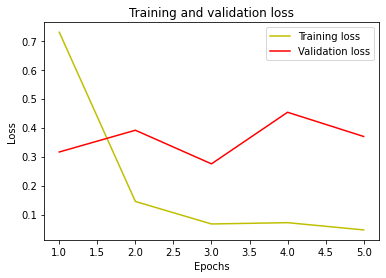

In [18]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

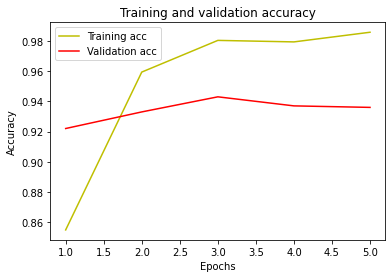

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[ 91   0   0   0   0   0   5   0   4   0]
 [  0  99   0   0   0   0   0   1   0   0]
 [  0   0  92   0   1   1   3   1   1   1]
 [  0   0   1  91   0   2   0   2   1   3]
 [  0   0   0   0  91   0   2   2   2   3]
 [  0   0   0   1   0  94   2   2   1   0]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   3   0   0   4   0   0  91   0   2]
 [  0   0   0   0   0   0   3   0  93   4]
 [  0   0   0   0   2   0   0   2   2  94]]


<AxesSubplot:>

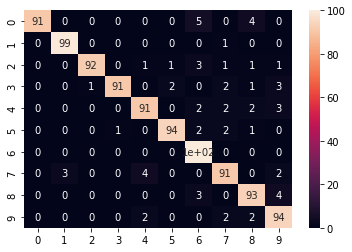

In [21]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [22]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.936


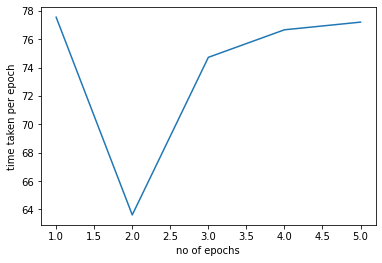

In [23]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = [77.54215884208679, 63.615025997161865, 74.71693730354309, 76.65812015533447, 77.19801783561707]


# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("time taken per epoch")
plt.show()


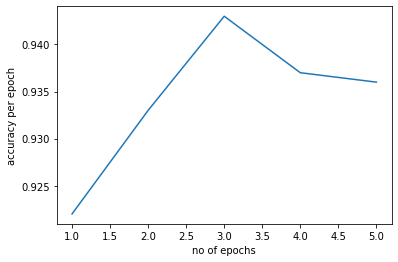

In [24]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = val_acc

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("accuracy per epoch")
plt.show()



In [25]:
print(val_acc)

[0.921999990940094, 0.9330000281333923, 0.9430000185966492, 0.9369999766349792, 0.9359999895095825]
